In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/VBO/Hafta 5/Ders Notları/amazon_review.csv', error_bad_lines=False)

In [ ]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,A2LBMKXRM5H2W9,B007WTAJTO,"ZM ""J""","[0, 0]",I bought this Sandisk 16GB Class 10 to use wit...,1.0,Do not waste your money.,1374537600,2013-07-23,503,0,0
4911,ALGDLRUI1ZPCS,B007WTAJTO,Zo,"[0, 0]",Used this for extending the capabilities of my...,5.0,Great item!,1377129600,2013-08-22,473,0,0
4912,A2MR1NI0ENW2AD,B007WTAJTO,Z S Liske,"[0, 0]",Great card that is very fast and reliable. It ...,5.0,Fast and reliable memory card,1396224000,2014-03-31,252,0,0
4913,A37E6P3DSO9QJD,B007WTAJTO,Z Taylor,"[0, 0]",Good amount of space for the stuff I want to d...,5.0,Great little card,1379289600,2013-09-16,448,0,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,4915.0,4.587589e+00,9.968451e-01,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,4915.0,1.379465e+09,1.581857e+07,1.339200e+09,1.365898e+09,1.381277e+09,1.392163e+09,1.406074e+09
day_diff,4915.0,4.373670e+02,2.094399e+02,1.000000e+00,2.810000e+02,4.310000e+02,6.010000e+02,1.064000e+03
helpful_yes,4915.0,1.311089e+00,4.161916e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.952000e+03
total_vote,4915.0,1.521465e+00,4.412309e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03


In [ ]:
# Checking all the comments belong different reviewers:

df["reviewerID"].value_counts()

A2OKRGHIYTBQ6P    1
A308JP3BK4VAL7    1
AILQ7WIS00OBC     1
A273KT0BQJCAXE    1
A13VPFBI3J7ORD    1
                 ..
ARS2C2RCNKK5V     1
A2KMV50FN2OS92    1
A3B7R0P6E0S0TM    1
A1SKJGBFWDF7IN    1
A3B8DBTBWUSO3P    1
Name: reviewerID, Length: 4915, dtype: int64

In [ ]:
df["overall"].value_counts()

5.0    3922
4.0     527
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

In [ ]:
# Checking all reviews belong the same product:

df["asin"].value_counts()

B007WTAJTO    4915
Name: asin, dtype: int64

In [ ]:
df_new = df.copy()

***RATE SCORING***

In this sections it is aimed to find another scoring rather than just .mean() function.

In [ ]:
df_new["helpful_no"] = df_new["total_vote"] - df_new["helpful_yes"]
df_new = df_new.iloc[:, [5, 9, 10, 12, 11]]
df_new

,overall,day_diff,helpful_yes,helpful_no,total_vote
0,4.0,138,0,0,0
1,5.0,409,0,0,0
2,4.0,715,0,0,0
3,5.0,382,0,0,0
4,5.0,513,0,0,0
...,...,...,...,...,...
4910,1.0,503,0,0,0
4911,5.0,473,0,0,0
4912,5.0,252,0,0,0
4913,5.0,448,0,0,0


In [ ]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,4915.0,4.587589,0.996845,1.0,5.0,5.0,5.0,5.0
day_diff,4915.0,437.367040,209.439871,1.0,281.0,431.0,601.0,1064.0
helpful_yes,4915.0,1.311089,41.619161,0.0,0.0,0.0,0.0,1952.0
helpful_no,4915.0,0.210376,4.023296,0.0,0.0,0.0,0.0,183.0
total_vote,4915.0,1.521465,44.123095,0.0,0.0,0.0,0.0,2020.0


In [ ]:
df_new.sort_values("overall", ascending=False).head(15)

,overall,day_diff,helpful_yes,helpful_no,total_vote
2457,5.0,504,0,0,0
3077,5.0,576,0,0,0
3083,5.0,527,0,0,0
3082,5.0,165,0,0,0
3081,5.0,412,0,0,0
3080,5.0,562,0,0,0
3079,5.0,457,0,0,0
3078,5.0,221,0,0,0
3075,5.0,199,0,0,0
3026,5.0,259,0,0,0


In [ ]:
# (up vote) - (down vote)

df_new["Up-Down"] = df_new["helpful_yes"] - df_new["helpful_no"]
df_new.sort_values("Up-Down", ascending=False).head(15)

,overall,day_diff,helpful_yes,helpful_no,total_vote,Up-Down
2031,5.0,702,1952,68,2020,1884
4212,1.0,579,1568,126,1694,1442
3449,5.0,803,1428,77,1505,1351
317,1.0,1033,422,73,495,349
3981,5.0,777,112,27,139,85
4596,1.0,807,82,27,109,55
1835,5.0,283,60,8,68,52
4672,5.0,158,45,4,49,41
4306,5.0,823,51,14,65,37
315,5.0,847,38,10,48,28


In [ ]:
# (up vote) / (down vote)

df_new["Up-Down Rate"] = df_new["helpful_yes"] / df_new["helpful_no"]
df_new.sort_values("Up-Down Rate", ascending=False).head(15)

,overall,day_diff,helpful_yes,helpful_no,total_vote,Up-Down,Up-Down Rate
8,5.0,259,1,0,1,1,inf
2972,5.0,664,1,0,1,1,inf
2954,5.0,402,1,0,1,1,inf
2953,5.0,644,1,0,1,1,inf
2947,5.0,943,1,0,1,1,inf
2937,2.0,626,1,0,1,1,inf
2930,5.0,157,2,0,2,2,inf
2920,5.0,171,1,0,1,1,inf
2901,5.0,574,1,0,1,1,inf
2885,5.0,262,1,0,1,1,inf




```
# Bu, kod` olarak biçimlendirilmiştir`
```

Majority of reviews not voted as helpful or not.

In [ ]:
def wilson_lower_bound(up, down, confidence=0.95):
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

In [ ]:
df_new["comment_wilson_lower_bound"] = df_new.apply(lambda x: wilson_lower_bound(x["helpful_yes"],
                                                                         x["helpful_no"]),
                                            axis=1)

In [ ]:
df_new

,overall,day_diff,helpful_yes,helpful_no,total_vote,Up-Down,Up-Down Rate,comment_wilson_lower_bound
0,4.0,138,0,0,0,0,NaN,0.0
1,5.0,409,0,0,0,0,NaN,0.0
2,4.0,715,0,0,0,0,NaN,0.0
3,5.0,382,0,0,0,0,NaN,0.0
4,5.0,513,0,0,0,0,NaN,0.0
...,...,...,...,...,...,...,...,...
4910,1.0,503,0,0,0,0,NaN,0.0
4911,5.0,473,0,0,0,0,NaN,0.0
4912,5.0,252,0,0,0,0,NaN,0.0
4913,5.0,448,0,0,0,0,NaN,0.0


In [ ]:
df_new.describe().T

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,count,mean,std,min,25%,50%,75%,max
overall,4915.0,4.587589,0.996845,1.0,5.0,5.0,5.0,5.000000
day_diff,4915.0,437.367040,209.439871,1.0,281.0,431.0,601.0,1064.000000
helpful_yes,4915.0,1.311089,41.619161,0.0,0.0,0.0,0.0,1952.000000
helpful_no,4915.0,0.210376,4.023296,0.0,0.0,0.0,0.0,183.000000
total_vote,4915.0,1.521465,44.123095,0.0,0.0,0.0,0.0,2020.000000
Up-Down,4915.0,1.100712,39.367949,-130.0,0.0,0.0,0.0,1884.000000
Up-Down Rate,555.0,inf,NaN,0.0,0.0,NaN,inf,inf
comment_wilson_lower_bound,4915.0,0.020053,0.077187,0.0,0.0,0.0,0.0,0.957544


In [ ]:
df_new.sort_values("comment_wilson_lower_bound", ascending=False).head(15)

,overall,day_diff,helpful_yes,helpful_no,total_vote,Up-Down,Up-Down Rate,comment_wilson_lower_bound
2031,5.0,702,1952,68,2020,1884,28.705882,0.957544
3449,5.0,803,1428,77,1505,1351,18.545455,0.936519
4212,1.0,579,1568,126,1694,1442,12.444444,0.912139
317,1.0,1033,422,73,495,349,5.780822,0.818577
4672,5.0,158,45,4,49,41,11.250000,0.808109
1835,5.0,283,60,8,68,52,7.500000,0.784651
3981,5.0,777,112,27,139,85,4.148148,0.732136
3807,3.0,649,22,3,25,19,7.333333,0.700442
4306,5.0,823,51,14,65,37,3.642857,0.670334
4596,1.0,807,82,27,109,55,3.037037,0.663595


In [ ]:
def overall_average(dataframe):
  return dataframe["overall"].mean()

In [ ]:
overall_average(df_new)

4.587589013224822

***Time Based Average***

In [ ]:
def time_based_weighted_average(dataframe, w1=40, w2=25, w3=20, w4=15):
    return dataframe.loc[dataframe["day_diff"] <= 30, "overall"].mean() * w1 / 100 + \
           dataframe.loc[(dataframe["day_diff"] > 30) & (dataframe["day_diff"] <= 90), "overall"].mean() * w2 / 100 + \
           dataframe.loc[(dataframe["day_diff"] > 90) & (dataframe["day_diff"] <= 180), "overall"].mean() * w3 / 100 + \
           dataframe.loc[(dataframe["day_diff"] > 180), "overall"].mean() * w4 / 100

In [ ]:
time_based_weighted_average(df_new)

4.713660004838061

As can be seen in df.describe(), most of the reviews are quite old (mean is 438 days). For this reason, the weight of reviews that are newer than 30 days has been determined as 40 percent in order to show the current reviews more importantly to the users who will buy the product.

***Comment Based Average***

In this section, it is aimed to see whether the effect of reviews found useful can be increased in the main average.

In [ ]:
def comment_based_weighted_average(dataframe, w1=5, w2=10, w3=20, w4=30, w5=35):
    return dataframe.loc[dataframe["comment_wilson_lower_bound"] < 0.30, "overall"].mean() * w1 / 100 + \
           dataframe.loc[(dataframe["comment_wilson_lower_bound"] >= 0.30) & (dataframe["comment_wilson_lower_bound"] < 0.50), "overall"].mean() * w2 / 100 + \
           dataframe.loc[(dataframe["comment_wilson_lower_bound"] >= 0.5) & (dataframe["comment_wilson_lower_bound"] < 0.7), "overall"].mean() * w3 / 100 + \
           dataframe.loc[(dataframe["comment_wilson_lower_bound"] >= 0.7) & (dataframe["comment_wilson_lower_bound"] < 0.9), "overall"].mean() * w4 / 100 + \
           dataframe.loc[(dataframe["comment_wilson_lower_bound"] >= 0.9), "overall"].mean() * w5 / 100

In [ ]:
comment_based_weighted_average(df_new)

3.972651666551811

***Hybrid Average***

In [ ]:
def hybrid_average(dataframe, w1=70, w2=30):
  return time_based_weighted_average(dataframe) * w1/100 + comment_based_weighted_average(dataframe) * w2/100

In [ ]:
hybrid_average(df_new)

4.483263487088207

Calculating an average in this way doesn't make much sense, as the majority of reviews aren't rated as helpful/not helpful. For this reason, a time-based evaluation was preferred instead of a hybrid averaging model based on time and comment voting.

***Final scoring:***

In [ ]:
time_based_weighted_average(df_new)
print("Time Based Weighted Average:", round(time_based_weighted_average(df_new), 4), "/ 5.0000")

Time Based Weighted Average: 4.7137 / 5.0000


**REVIEW LISTING**

In [ ]:
df_comment = df.copy()

In [ ]:
df_comment["helpful_no"] = df_comment["total_vote"] - df_comment["helpful_yes"]
df_comment = df_comment.iloc[:, [4, 5, 9, 10, 12, 11]]
df_comment

,reviewText,overall,day_diff,helpful_yes,helpful_no,total_vote
0,No issues.,4.0,138,0,0,0
1,"Purchased this for my device, it worked as adv...",5.0,409,0,0,0
2,it works as expected. I should have sprung for...,4.0,715,0,0,0
3,This think has worked out great.Had a diff. br...,5.0,382,0,0,0
4,"Bought it with Retail Packaging, arrived legit...",5.0,513,0,0,0
...,...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0,503,0,0,0
4911,Used this for extending the capabilities of my...,5.0,473,0,0,0
4912,Great card that is very fast and reliable. It ...,5.0,252,0,0,0
4913,Good amount of space for the stuff I want to d...,5.0,448,0,0,0


In [ ]:
df_comment["reviewText_len"] = df_comment['reviewText'].astype('str').map(len)
df_comment

,reviewText,overall,day_diff,helpful_yes,helpful_no,total_vote,reviewText_len
0,No issues.,4.0,138,0,0,0,10
1,"Purchased this for my device, it worked as adv...",5.0,409,0,0,0,158
2,it works as expected. I should have sprung for...,4.0,715,0,0,0,166
3,This think has worked out great.Had a diff. br...,5.0,382,0,0,0,340
4,"Bought it with Retail Packaging, arrived legit...",5.0,513,0,0,0,290
...,...,...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0,503,0,0,0,320
4911,Used this for extending the capabilities of my...,5.0,473,0,0,0,148
4912,Great card that is very fast and reliable. It ...,5.0,252,0,0,0,233
4913,Good amount of space for the stuff I want to d...,5.0,448,0,0,0,91


There may be a correlation between the length of the review text and the usefulness of the review. For example, comments such as "the product is nice" and "the product has a deformation on it's right shoulder" will look different in the eyes of a user, which can affect whether the buyer buys the product or not.

In [ ]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (16,8))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

,overall,day_diff,helpful_yes,helpful_no,total_vote,reviewText_len
overall,1.000000,-0.092597,-0.031213,-0.066144,-0.035473,-0.261134
day_diff,-0.092597,1.000000,0.038783,0.029656,0.039286,0.135200
helpful_yes,-0.031213,0.038783,1.000000,0.592746,0.997300,0.445967
helpful_no,-0.066144,0.029656,0.592746,1.000000,0.650292,0.298253
total_vote,-0.035473,0.039286,0.997300,0.650292,1.000000,0.447854
reviewText_len,-0.261134,0.135200,0.445967,0.298253,0.447854,1.000000


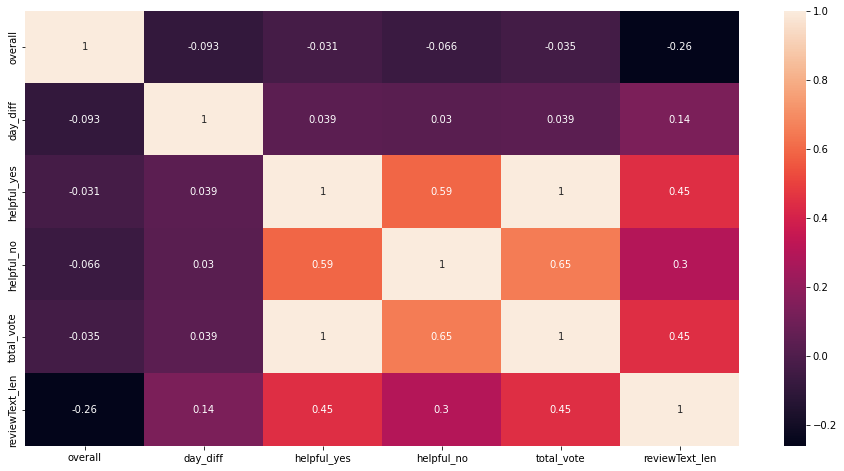

In [ ]:
# Checking the correlation between different parameters:

show_correlations(df_comment)

In [ ]:
df_comment.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,4915.0,4.587589,0.996845,1.0,5.0,5.0,5.0,5.0
day_diff,4915.0,437.367040,209.439871,1.0,281.0,431.0,601.0,1064.0
helpful_yes,4915.0,1.311089,41.619161,0.0,0.0,0.0,0.0,1952.0
helpful_no,4915.0,0.210376,4.023296,0.0,0.0,0.0,0.0,183.0
total_vote,4915.0,1.521465,44.123095,0.0,0.0,0.0,0.0,2020.0
reviewText_len,4915.0,267.693591,328.852813,3.0,123.0,172.0,289.0,8638.0


The longer the review, the more likely it is to be useful. However, the overall score given to the product decreases inversely proportional to this increase in review length.

The timeliness of the review is as important as its length. Therefore, highlighting up-to-date reviews may affect customers' purchasing status.

In [ ]:
def scaled_time(dataframe):
  dataframe["scaled_time_diff"] = MinMaxScaler(feature_range=(0, 1)).fit(dataframe[["day_diff"]]).transform(dataframe[["day_diff"]])

In [ ]:
scaled_time(df_comment)

Voting status of the reviews:

In [ ]:
def wilson_lower_bound(up, down, confidence=0.95):
    n = up + down
    if n == 0:
        return 0
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    phat = 1.0 * up / n
    return (phat + z * z / (2 * n) - z * math.sqrt((phat * (1 - phat) + z * z / (4 * n)) / n)) / (1 + z * z / n)

In [ ]:
df_comment["wilson_lower_bound"] = df_comment.apply(lambda x: wilson_lower_bound(x["helpful_yes"],
                                                                                   x["helpful_no"]),
                                                      axis=1)

In [ ]:
df_comment

,reviewText,overall,day_diff,helpful_yes,helpful_no,total_vote,reviewText_len,scaled_time_diff,reviewText_len_scaled,wilson_lower_bound
0,No issues.,4.0,138,0,0,0,10,0.128881,0.000811,0.0
1,"Purchased this for my device, it worked as adv...",5.0,409,0,0,0,158,0.383819,0.017950,0.0
2,it works as expected. I should have sprung for...,4.0,715,0,0,0,166,0.671684,0.018877,0.0
3,This think has worked out great.Had a diff. br...,5.0,382,0,0,0,340,0.358420,0.039027,0.0
4,"Bought it with Retail Packaging, arrived legit...",5.0,513,0,0,0,290,0.481656,0.033237,0.0
...,...,...,...,...,...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0,503,0,0,0,320,0.472248,0.036711,0.0
4911,Used this for extending the capabilities of my...,5.0,473,0,0,0,148,0.444026,0.016792,0.0
4912,Great card that is very fast and reliable. It ...,5.0,252,0,0,0,233,0.236124,0.026636,0.0
4913,Good amount of space for the stuff I want to d...,5.0,448,0,0,0,91,0.420508,0.010191,0.0


In [ ]:
df_comment["reviewText_len_scaled"] = MinMaxScaler(feature_range=(0, 1)). \
    fit(df_comment[["reviewText_len"]]). \
    transform(df_comment[["reviewText_len"]])

In [ ]:
df_comment

,reviewText,overall,day_diff,helpful_yes,helpful_no,total_vote,reviewText_len,scaled_time_diff,reviewText_len_scaled,wilson_lower_bound
0,No issues.,4.0,138,0,0,0,10,0.128881,0.000811,0.0
1,"Purchased this for my device, it worked as adv...",5.0,409,0,0,0,158,0.383819,0.017950,0.0
2,it works as expected. I should have sprung for...,4.0,715,0,0,0,166,0.671684,0.018877,0.0
3,This think has worked out great.Had a diff. br...,5.0,382,0,0,0,340,0.358420,0.039027,0.0
4,"Bought it with Retail Packaging, arrived legit...",5.0,513,0,0,0,290,0.481656,0.033237,0.0
...,...,...,...,...,...,...,...,...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0,503,0,0,0,320,0.472248,0.036711,0.0
4911,Used this for extending the capabilities of my...,5.0,473,0,0,0,148,0.444026,0.016792,0.0
4912,Great card that is very fast and reliable. It ...,5.0,252,0,0,0,233,0.236124,0.026636,0.0
4913,Good amount of space for the stuff I want to d...,5.0,448,0,0,0,91,0.420508,0.010191,0.0


In [ ]:
def hybrid_avre_wilson_len(dataframe, w1=50, w2=10, w3=40):
  dataframe["hybrid_review_score"] = dataframe["wilson_lower_bound"] * w1/100 + dataframe["scaled_time_diff"] * w2/100 + dataframe["reviewText_len_scaled"] * w3/100
  return dataframe.sort_values("hybrid_review_score", ascending=False).head(20)

In [ ]:
hybrid_avre_wilson_len(df_comment)

,reviewText,overall,day_diff,helpful_yes,helpful_no,total_vote,reviewText_len,scaled_time_diff,reviewText_len_scaled,wilson_lower_bound,hybrid_review_score
4212,NOTE: please read the last update (scroll to ...,1.0,579,1568,126,1694,8638,0.543744,1.000000,0.912139,0.910444
2031,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,5.0,702,1952,68,2020,5880,0.659454,0.680602,0.957544,0.816958
3449,I have tested dozens of SDHC and micro-SDHC ca...,5.0,803,1428,77,1505,3595,0.754468,0.415981,0.936519,0.710099
4596,Hi:I ordered two card and they arrived the nex...,1.0,807,82,27,109,4132,0.758231,0.478170,0.663595,0.598889
317,"If your card gets hot enough to be painful, it...",1.0,1033,422,73,495,1344,0.970837,0.155298,0.818577,0.568491
4672,Sandisk announcement of the first 128GB micro ...,5.0,158,45,4,49,1929,0.147695,0.223046,0.808109,0.508042
3981,The last few days I have been diligently shopp...,5.0,777,112,27,139,717,0.730009,0.082687,0.732136,0.472143
76,**Update 6.24.14**My 128 GB card stopped allow...,5.0,593,3,0,3,4253,0.556914,0.492183,0.438503,0.471816
121,Update: providing an update with regard to San...,5.0,943,5,0,5,1965,0.886171,0.227215,0.565518,0.462262
315,Bought this card to use with my Samsung Galaxy...,5.0,847,38,10,48,907,0.795861,0.104690,0.657411,0.450168


To sum up, the usefulness, timeliness and length of the review were taken into account in calculating the top 20 comments to be shown to the customer.